In [64]:
using DataFrames
using CSV
using StatsBase
using Plots

# Evaluations

In [4]:
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0525_batch_00_01.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))

hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))

,0
,Float64
1,4.96949e10
2,4.85494e10
3,4.47668e10
4,4.49106e10
5,5.42743e10
6,4.16979e10
7,4.09721e10
8,4.14693e10
9,4.1515e10


In [12]:
sim_data

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.69693e9
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,2.10339e9
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.70583e9
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,2.011e9
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,1.60914e9
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.8101e9
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.81005e9


## Calculate RMSD

In [17]:
Y = Matrix(sim_data)/.10e9
h = Matrix(hist_data)/.10e9 # GJ Matrix

12×1 Matrix{Float64}:
 496.9488797635679
 485.49410922441626
 447.66776221326006
 449.10608732816405
 542.742835921668
 416.97897525831576
 409.72087017759634
 414.692987493636
 415.14988501630796
 533.7295014723481
 501.57244633798837
 415.21494332559615

In [20]:
y = []
for i=1:size(Y,2)
    append!(y, rmsd(Y[:, i], h, normalize=false))
end
y; # 378 element vector 

# Samples

In [22]:
# samples
samples_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/samples/samples_0525_378_DGSM.csv"
samples_data = DataFrame(CSV.File(samples_path))
samples = Matrix(samples_data);
samples_data 

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.5,0.25,0.75,0.125,0.625,0.375,0.875,0.50001
2,0.333333,0.666667,0.111111,0.444444,0.777778,0.222222,0.555556,0.333333
3,0.2,0.4,0.6,0.8,0.04,0.24,0.44,0.2
4,0.142857,0.285714,0.428571,0.571429,0.714286,0.857143,0.0204082,0.142857
5,0.0909091,0.181818,0.272727,0.363636,0.454545,0.545455,0.636364,0.0909091
6,0.0769231,0.153846,0.230769,0.307692,0.384615,0.461538,0.538462,0.0769231
7,0.0588235,0.117647,0.176471,0.235294,0.294118,0.352941,0.411765,0.0588235
8,0.0526316,0.105263,0.157895,0.210526,0.263158,0.315789,0.368421,0.0526316
9,0.0434783,0.0869565,0.130435,0.173913,0.217391,0.26087,0.304348,0.0434783


# Calculate DGSM, ν

In [57]:

n = 7 # num design_points 
k = 53 # num dimensions 
i = 2 # current dimension

νs = []

for i in 1:52
    sums = 0 
    for j in 1:7
        pt_delta = n + k*(j-1) + i
        pt = j
        sums += abs(y[pt_delta] - y[pt])^2/abs(samples[pt_delta] - samples[pt])
    end
    push!(νs, sums)
end
print(νs)

Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001474036549273862, 6.071790411011747e-5, 8.996822084272512e-5, 1.6560567387349957e-5, 2.5370958939789825e-6, 6.707388347710823e-6, 3.065945933679666e-6, 0.0, 0.0, 0.0, 2.230040185532571e-5, 2.4381176447465186e-5, 2.6161572423925394e-5, 2.8564007073328124e-7, 3.463025017640519e-6, 5.415763516380903e-6, 4.57641536281885e-6, 1.8756838060147705e-8, 3.96126000958203e-6, 3.6771321526519635e-6, 2.8107762039561046e-6, 1.1344025113402565e-8, 7.557951394471899e-7, 7.038667504739746e-7, 6.757854644616126e-7, 5.341281194162372e-9, 1.3532567437325419e-7, 1.330898204686139e-7, 1.236511412295154e-7, 0.0, 1.8020598564286957e-7, 1.781505804429408e-7, 1.675697772638227e-7, 1.1518547398677265e-9, 7.604653954634883e-8, 7.540796727564807e-8, 7.419620636735944e-8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [60]:
ν_sort_ix = sortperm(νs, rev=true)
print(ν_sort_ix)


[8, 10, 9, 20, 19, 18, 11, 13, 23, 24, 26, 27, 22, 14, 28, 12, 30, 31, 32, 21, 38, 39, 40, 34, 35, 36, 42, 43, 44, 25, 29, 33, 41, 1, 2, 3, 4, 5, 6, 7, 15, 16, 17, 37, 45, 46, 47, 48, 49, 50, 51, 52]

In [61]:
nu_sort = νs[ν_sort_ix]

52-element Vector{Any}:
 0.0001474036549273862
 8.996822084272512e-5
 6.071790411011747e-5
 2.6161572423925394e-5
 2.4381176447465186e-5
 2.230040185532571e-5
 1.6560567387349957e-5
 6.707388347710823e-6
 5.415763516380903e-6
 4.57641536281885e-6
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

# Plot


In [62]:
nu_total = Base.sum(nu_sort)

0.0004273096255495289

In [65]:
nu_percent = nu_sort/nu_total;

In [69]:
y = nu_percent;

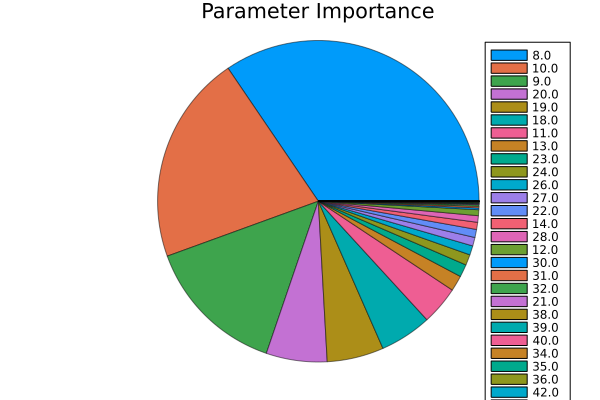

In [72]:
pie(ν_sort_ix, y, title = "Parameter Importance", l = 0.5)